In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
categoricals = list(data.dtypes[data.dtypes == 'object'].index)
for c in categoricals:
    data[c] = data[c].str.lower().str.replace(' ', '_')
    
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')
data.totalcharges = data.totalcharges.fillna(0)

churn = (data.churn == 'yes').astype('int')
data.churn = churn

In [ ]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [ ]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [ ]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train[categorical + numerical].to_dict(orient='records'))
X_val = dv.transform(df_val[categorical + numerical].to_dict(orient='records'))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict_proba(X_val)[:, 1]
churn_decision = y_pred > 0.5
accuracy = (y_val == churn_decision).mean()
accuracy

/Users/abhisheksharma/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8026969481902059

In [ ]:
thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
    churn_decision = y_pred > t
    score = (y_val == churn_decision).mean()
    scores.append(score)
    print(f"For threhold {t:.2f}, the score is: {score: .3f}") 

For threhold 0.00, the score is:  0.274
For threhold 0.05, the score is:  0.508
For threhold 0.10, the score is:  0.592
For threhold 0.15, the score is:  0.667
For threhold 0.20, the score is:  0.710
For threhold 0.25, the score is:  0.738
For threhold 0.30, the score is:  0.760
For threhold 0.35, the score is:  0.772
For threhold 0.40, the score is:  0.786
For threhold 0.45, the score is:  0.793
For threhold 0.50, the score is:  0.803
For threhold 0.55, the score is:  0.801
For threhold 0.60, the score is:  0.795
For threhold 0.65, the score is:  0.786
For threhold 0.70, the score is:  0.765
For threhold 0.75, the score is:  0.744
For threhold 0.80, the score is:  0.735
For threhold 0.85, the score is:  0.726
For threhold 0.90, the score is:  0.726
For threhold 0.95, the score is:  0.726
For threhold 1.00, the score is:  0.726


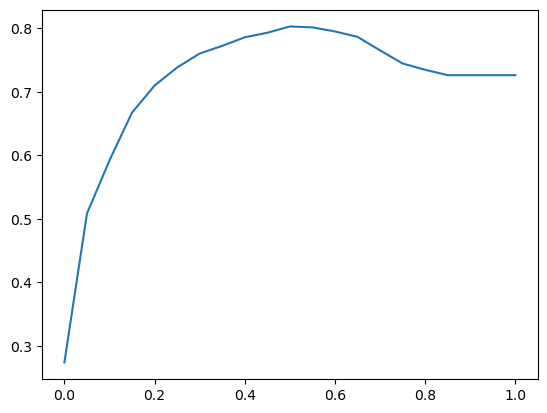

In [ ]:
plt.plot(thresholds, scores);

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
    churn_decision = y_pred > t
    score = accuracy_score(y_val, churn_decision)
    scores.append(score)
    print(f"For threhold {t:.2f}, the score is: {score: .3f}") 

For threhold 0.00, the score is:  0.274
For threhold 0.05, the score is:  0.508
For threhold 0.10, the score is:  0.592
For threhold 0.15, the score is:  0.667
For threhold 0.20, the score is:  0.710
For threhold 0.25, the score is:  0.738
For threhold 0.30, the score is:  0.760
For threhold 0.35, the score is:  0.772
For threhold 0.40, the score is:  0.786
For threhold 0.45, the score is:  0.793
For threhold 0.50, the score is:  0.803
For threhold 0.55, the score is:  0.801
For threhold 0.60, the score is:  0.795
For threhold 0.65, the score is:  0.786
For threhold 0.70, the score is:  0.765
For threhold 0.75, the score is:  0.744
For threhold 0.80, the score is:  0.735
For threhold 0.85, the score is:  0.726
For threhold 0.90, the score is:  0.726
For threhold 0.95, the score is:  0.726
For threhold 1.00, the score is:  0.726


In [ ]:
(y_pred > 1.0)

array([False, False, False, ..., False, False, False])

In [ ]:
from collections import Counter

Counter(y_pred > 1.0)

Counter({False: 1409})

### Confusion Table

In [ ]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [ ]:
t = 0.5
pred_positive = (y_pred >= t)
pred_negative = (y_pred < t)

In [ ]:
tp = (actual_positive & pred_positive).sum()
tn = (actual_negative & pred_negative).sum()

In [ ]:
tp, tn

(210, 921)

In [ ]:
fp = (actual_negative & pred_positive).sum()
fn = (actual_positive & pred_negative).sum()

In [ ]:
fp, fn

(102, 176)

In [ ]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[921, 102],
       [176, 210]])

In [ ]:
(confusion_matrix / confusion_matrix.sum()).round(4)

array([[0.6537, 0.0724],
       [0.1249, 0.149 ]])

### Precision and Recall

In [ ]:
p = tp / (tp + fp)
p

0.6730769230769231

In [ ]:
r = tp / (tp + fn)
r

0.5440414507772021

### ROC Curves

#### TPR and FPR

In [ ]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [ ]:
r

0.5440414507772021

In [ ]:
fpr = fp / (tn + fp)
fpr

0.09970674486803519

In [ ]:
thresholds = np.linspace(0, 1, 101)
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    pred_positive = (y_pred >= t)
    pred_negative = (y_pred < t)
    
    tp = (actual_positive & pred_positive).sum()
    tn = (actual_negative & pred_negative).sum()
    fp = (actual_negative & pred_positive).sum()
    fn = (actual_positive & pred_negative).sum()
    scores.append((t, tp, fp, fn, tn ))

In [ ]:
columns = ['threshold', 'TP', 'FP', 'FN', 'TN']
df_score = pd.DataFrame(scores, columns=columns)
df_score[::10]

,threshold,TP,FP,FN,TN
0,0.0,386,1023,0,0
10,0.1,366,555,20,468
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,165,137,858
50,0.5,210,102,176,921
60,0.6,150,53,236,970
70,0.7,75,20,311,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [ ]:
df_score['TPR'] = df_score['TP']/(df_score['FN'] + df_score['TP'])
df_score['FPR'] = df_score['FP']/(df_score['TN'] + df_score['FP'])
df_score[::10]

,threshold,TP,FP,FN,TN,TPR,FPR
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,555,20,468,0.948187,0.542522
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,165,137,858,0.645078,0.161290
50,0.5,210,102,176,921,0.544041,0.099707
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,20,311,1003,0.194301,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


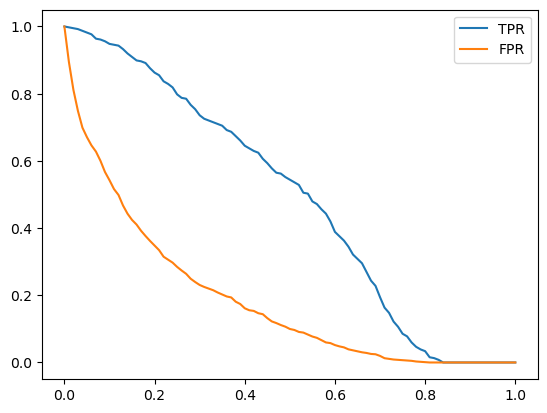

In [ ]:
plt.plot(df_score.threshold, df_score.TPR, label='TPR')
plt.plot(df_score.threshold, df_score.FPR, label='FPR')
plt.legend();

#### Random Model

In [ ]:
def tpr_fpr_dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)
    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        pred_positive = (y_pred >= t)
        pred_negative = (y_pred < t)

        tp = (actual_positive & pred_positive).sum()
        tn = (actual_negative & pred_negative).sum()
        fp = (actual_negative & pred_positive).sum()
        fn = (actual_positive & pred_negative).sum()
        scores.append((t, tp, fp, fn, tn ))
    columns = ['threshold', 'TP', 'FP', 'FN', 'TN']
    df_score = pd.DataFrame(scores, columns=columns)
    df_score['TPR'] = df_score['TP']/(df_score['FN'] + df_score['TP'])
    df_score['FPR'] = df_score['FP']/(df_score['TN'] + df_score['FP'])
    return df_score

In [ ]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val)).round(3)

In [ ]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

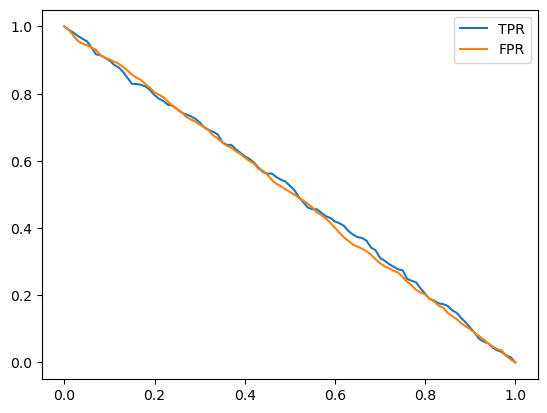

In [ ]:
plt.plot(df_rand.threshold, df_rand.TPR, label='TPR')
plt.plot(df_rand.threshold, df_rand.FPR, label='FPR')
plt.legend();

In [ ]:
df_rand

,threshold,TP,FP,FN,TN,TPR,FPR
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,382,1013,4,10,0.989637,0.990225
2,0.02,379,995,7,28,0.981865,0.972630
3,0.03,375,979,11,44,0.971503,0.956989
4,0.04,372,971,14,52,0.963731,0.949169
...,...,...,...,...,...,...,...
96,0.96,14,41,372,982,0.036269,0.040078
97,0.97,12,36,374,987,0.031088,0.035191
98,0.98,8,20,378,1003,0.020725,0.019550
99,0.99,6,9,380,1014,0.015544,0.008798


#### Ideal Model

In [ ]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [ ]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [ ]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

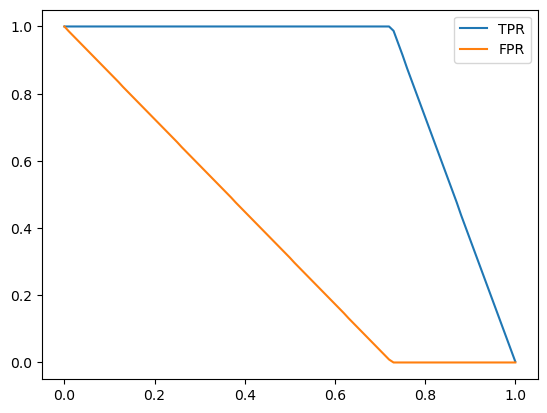

In [ ]:
plt.plot(df_ideal.threshold, df_ideal.TPR, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.FPR, label='FPR')
plt.legend();

#### Putting it all together

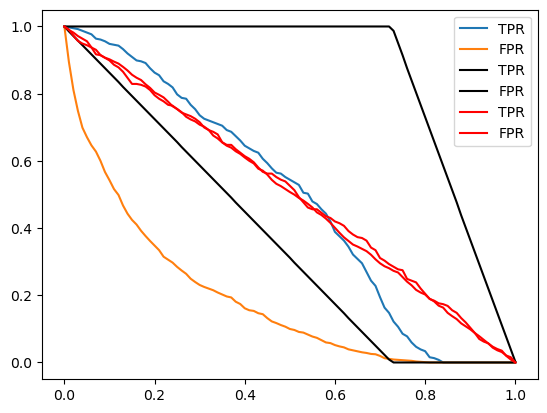

In [ ]:
plt.plot(df_score.threshold, df_score.TPR, label='TPR')
plt.plot(df_score.threshold, df_score.FPR, label='FPR')

plt.plot(df_ideal.threshold, df_ideal.TPR, label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal.FPR, label='FPR', color = 'black')

plt.plot(df_rand.threshold, df_rand.TPR, label='TPR', color='red')
plt.plot(df_rand.threshold, df_rand.FPR, label='FPR', color = 'red')
plt.legend();

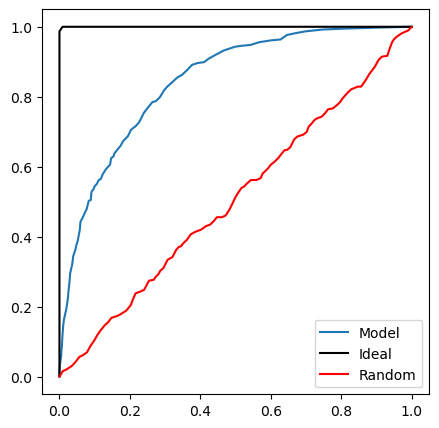

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(df_score.FPR, df_score.TPR, label='Model')

plt.plot(df_ideal.FPR, df_ideal.TPR, label='Ideal', color='black')

plt.plot( df_rand.FPR, df_rand.TPR, label='Random', color='red')

plt.legend();

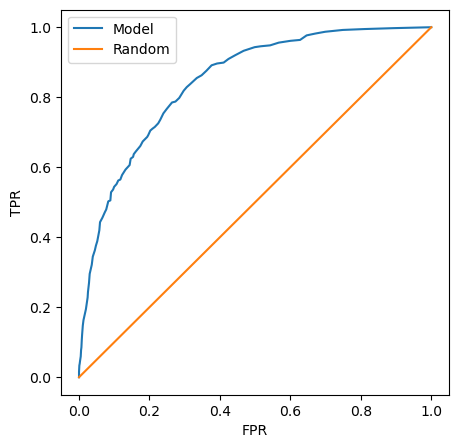

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(df_score.FPR, df_score.TPR, label='Model')

#plt.plot(df_ideal.FPR, df_ideal.TPR, label='Ideal', color='black')

plt.plot( [0, 1], [0, 1], label='Random')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

In [ ]:
from sklearn.metrics import roc_curve

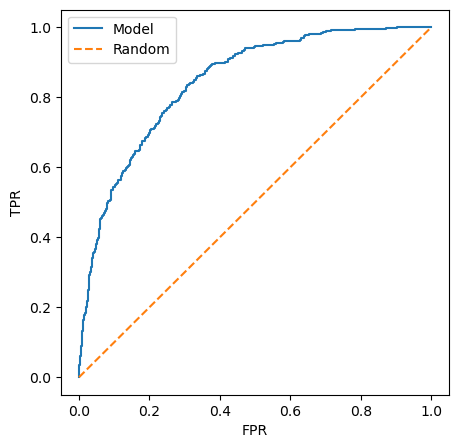

In [ ]:
plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.plot(fpr, tpr, label='Model')
plt.plot( [0, 1], [0, 1], label='Random', ls='--')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

#### Area Under ROC Curve

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fpr, tpr)

0.8437745328937039

In [ ]:
auc(df_score.FPR, df_score.TPR)

0.8437707342520981

In [ ]:
auc(df_ideal.FPR, df_ideal.TPR)

0.9999430203759136

In [ ]:
auc(df_rand.FPR, df_rand.TPR)

0.5061462021181226

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_val, y_pred)

0.8437745328937039

In [ ]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [ ]:
import random

In [ ]:
n = 100000
success = 0

for _ in range(n):
    neg_index = random.randint(0, len(neg) - 1)
    pos_index = random.randint(0, len(pos) - 1)
    if pos[pos_index] > neg[neg_index]:
        success += 1
        
success / n

0.84475

In [ ]:
#using numpy
n = 100000
np.random.seed(1)
neg_in = np.random.randint(0, len(neg), n)
pos_in = np.random.randint(0, len(pos), n)

(pos[pos_in] > neg[neg_in]).mean()

0.84466

#### Cross Validation

In [ ]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X, y_train)
    return dv, model

In [ ]:
dv, model = train(df_train, y_train)

/Users/abhisheksharma/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [ ]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.0090318 , 0.20561103, 0.21333108, ..., 0.13692382, 0.79929236,
       0.83682706])

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [ ]:
len(train_idx), len(val_idx)

(5070, 564)

In [ ]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[train_idx]

In [ ]:
from tqdm.auto import tqdm

In [ ]:
n_splits = 5
C = [0.001, 0.01, 0.1, 1.0, 5, 10]
scores = []
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for c in tqdm(C):
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=c)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print(f"C:{c} -- scores {np.mean(scores):.2f} +- {np.std(scores):.2f}")

  0%|          | 0/6 [00:00<?, ?it/s]

C:0.001 -- scores 0.82 +- 0.02
C:0.01 -- scores 0.83 +- 0.02
C:0.1 -- scores 0.84 +- 0.02
C:1.0 -- scores 0.84 +- 0.02
C:5 -- scores 0.84 +- 0.02
C:10 -- scores 0.84 +- 0.01


In [ ]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)
roc_auc_score(y_test, y_pred)

0.8572386167896259